<h2> The Sparks Foundation - Data Science & Business Analytics Internship </h2>

<h3> Task 1- Prediction using Supervised Mchine Learning </h3>

<p> In this task is required to predict the percentage of a student on the base of the number of hours studied using the Linear Regression Supervised machine Learning algorithm</p>

<h2> Step 1 - Importing the Dataset </h2>

In [1]:
#Importing the all requried libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [2]:
#Reading data

url = "https://raw.githubusercontent.com/AdiPersonalWorks/Random/master/student_scores%20-%20student_scores.csv"
df = pd.read_csv(url)

In [3]:
# now let's see the dataset
df.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [4]:
df.tail()

,Hours,Scores
20,2.7,30
21,4.8,54
22,3.8,35
23,6.9,76
24,7.8,86


In [5]:
# To find the number of columns and rows

df.shape

(25, 2)

In [6]:
# To find more information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [7]:
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


In [8]:
# now we will check if dataset contain null or missing values

df.isnull().sum()

Hours     0
Scores    0
dtype: int64

<p> As we can see we do not have any null value in our dataset so we can now move on to our next step </p>

<h2> Step 2 - Visualizing the dataset </h2>

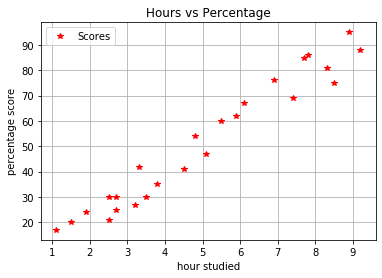

In [10]:
# Plotting the dataset

df.plot(x='Hours' , y='Scores', style='*',color='red', markersize=6)
plt.title('Hours vs Percentage')
plt.xlabel('hour studied')
plt.ylabel('percentage score')
plt.grid()
plt.show()

<p> From the above graph we can observe that there is a linear relationship between "hours studied" and "percentage score".so we can use the linear regression supervised machine learning model on it for prediction </p>

In [11]:
# find the correlation
df.corr()

,Hours,Scores
Hours,1.000000,0.976191
Scores,0.976191,1.000000


<h2>Step 3 - Data preparation </h2>

In [12]:
# using iloc function we will divide the data

x = df.iloc[: , :1].values
y = df.iloc[: , 1:].values

In [13]:
x

array([[2.5],
       [5.1],
       [3.2],
       [8.5],
       [3.5],
       [1.5],
       [9.2],
       [5.5],
       [8.3],
       [2.7],
       [7.7],
       [5.9],
       [4.5],
       [3.3],
       [1.1],
       [8.9],
       [2.5],
       [1.9],
       [6.1],
       [7.4],
       [2.7],
       [4.8],
       [3.8],
       [6.9],
       [7.8]])

In [14]:
y

array([[21],
       [47],
       [27],
       [75],
       [30],
       [20],
       [88],
       [60],
       [81],
       [25],
       [85],
       [62],
       [41],
       [42],
       [17],
       [95],
       [30],
       [24],
       [67],
       [69],
       [30],
       [54],
       [35],
       [76],
       [86]], dtype=int64)

In [15]:
# spliting data into training and testing data

from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x , y, test_size=0.3, random_state=0)

<h2> Step 4 - Training the Algorithm

In [16]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train , y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<h2> Step 5 - Visualizing the model

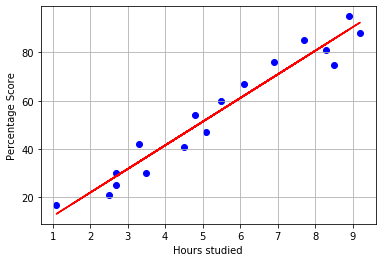

In [19]:
line = model.coef_*x + model.intercept_

plt.scatter(x_train , y_train , color="blue")
plt.plot(x, line , color = "red")
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.grid()
plt.show()

<h2> Step 6 - Making Predictions

In [20]:
y_pred = model.predict(x_test)

In [21]:
y_test

array([[20],
       [27],
       [69],
       [30],
       [62],
       [35],
       [24],
       [86]], dtype=int64)

In [22]:
y_pred

array([[17.05366541],
       [33.69422878],
       [74.80620886],
       [26.8422321 ],
       [60.12335883],
       [39.56736879],
       [20.96909209],
       [78.72163554]])

In [24]:
# comparing actual vs predicted

comp = pd.DataFrame({'Actual':[y_test],'Predicted':[y_pred]})
comp

,Actual,Predicted
0,"[[20], [27], [69], [30], [62], [35], [24], [86]]","[[17.05366541246544], [33.694228779938825], [7..."


In [25]:
# testing with own data

hours = 10
own_pred = model.predict([[hours]])
print("The prediction score if a student studied for",hours,"hours is",own_pred[0])

The prediction score if a student studied for 10 hours is [100.25648225]


<h2> Step 7 - Evaluating the model

In [26]:
from sklearn import metrics

print("Mean absolute Error: ",metrics.mean_absolute_error(y_test,y_pred))

Mean absolute Error:  4.4197278080276545
